# Wrangling House Price data

In [21]:
import sys
import os
import pandas as pd
import seaborn as sns
from pathlib import Path

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))

module_path = Path.cwd().parent
# print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
# print(sys.path)
import settings
# from kaggle import settings

## Configuration

In [24]:
csv_file = settings.APP_FOLDER / 'data' / 'Real_Estate_Sales_2001-2020_GL.csv'

In [25]:
df = pd.read_csv(csv_file)

df.shape

/tmp/ipykernel_2583586/1049389636.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


(997213, 14)

In [47]:
df.sample(5)

,serial_number,list_year,date_recorded,town,address,assessed_value,sale_amount,sales_ratio,property_type,residential_type,non_use_code,assessor_remarks,opm_remarks,location
145352,22309,2002,07/11/2003,Bridgeport,33-35 PIXLEE PL,84210.0,170000.0,0.495353,UNKOWN PROPERTY TYPE,UNKOWN RESIDENTIAL TYPE,UNKOWN,NaN,NaN,NaN
930312,190039,2019,04/27/2020,Kent,121 SPOONER HILL RD,205500.0,300000.0,0.685000,Single Family,Single Family,UNKOWN,NaN,NaN,NaN
542393,90280,2009,05/28/2010,New Milford,157 LONE OAK DR,173880.0,154000.0,1.129091,Single Family,Single Family,14 - Foreclosure,CODE 14,NaN,NaN
334554,40408,2004,05/02/2005,Windsor,252 CARRIAGE WAY,166600.0,282500.0,0.589735,UNKOWN PROPERTY TYPE,UNKOWN RESIDENTIAL TYPE,UNKOWN,NaN,NaN,NaN
486628,70178,2007,07/02/2008,Seymour,125 SKOKORAT ST,190400.0,320000.0,0.595000,Single Family,Single Family,UNKOWN,NaN,NaN,POINT (-73.05411 41.41067)


## Data cleanup

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     997213 non-null  int64  
 1   List Year         997213 non-null  int64  
 2   Date Recorded     997211 non-null  object 
 3   Town              997213 non-null  object 
 4   Address           997162 non-null  object 
 5   Assessed Value    997213 non-null  float64
 6   Sale Amount       997213 non-null  float64
 7   Sales Ratio       997213 non-null  float64
 8   Property Type     614767 non-null  object 
 9   Residential Type  608904 non-null  object 
 10  Non Use Code      289681 non-null  object 
 11  Assessor Remarks  149864 non-null  object 
 12  OPM remarks       9934 non-null    object 
 13  Location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


### Renaming columns

In [29]:
renamed_mapping = {}

for c in df.columns:
    renamed_mapping[c] = c.lower().replace(' ', '_')

df = df.rename(columns=renamed_mapping)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial_number     997213 non-null  int64  
 1   list_year         997213 non-null  int64  
 2   date_recorded     997211 non-null  object 
 3   town              997213 non-null  object 
 4   address           997162 non-null  object 
 5   assessed_value    997213 non-null  float64
 6   sale_amount       997213 non-null  float64
 7   sales_ratio       997213 non-null  float64
 8   property_type     614767 non-null  object 
 9   residential_type  608904 non-null  object 
 10  non_use_code      289681 non-null  object 
 11  assessor_remarks  149864 non-null  object 
 12  opm_remarks       9934 non-null    object 
 13  location          197697 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 106.5+ MB


### Cleaning nulls

In [42]:
df.isna().sum()

serial_number            0
list_year                0
date_recorded            2
town                     0
address                 51
assessed_value           0
sale_amount              0
sales_ratio              0
property_type            0
residential_type         0
non_use_code             0
assessor_remarks    847349
opm_remarks         987279
location            799516
dtype: int64

In [41]:
df['property_type'] = df['property_type'].fillna("UNKOWN PROPERTY TYPE")
df['residential_type'] = df['residential_type'].fillna("UNKOWN RESIDENTIAL TYPE")
df['non_use_code'] = df['non_use_code'].fillna("UNKOWN")

### Finding categories

In [30]:
df['town'].value_counts()

town
Bridgeport       34201
Stamford         32529
Waterbury        28506
Norwalk          23960
New Haven        21346
                 ...  
Hartland           448
Scotland           430
Canaan             429
Union              261
***Unknown***        1
Name: count, Length: 170, dtype: int64

In [31]:
df['property_type'].value_counts()

property_type
Single Family     401612
Condo             105420
Residential        60728
Two Family         26408
Three Family       12586
Vacant Land         3163
Four Family         2150
Commercial          1981
Apartments           486
Industrial           228
Public Utility         5
Name: count, dtype: int64

In [33]:
df['residential_type'].value_counts()

residential_type
Single Family    445016
Condo            117780
Two Family        29609
Three Family      14081
Four Family        2418
Name: count, dtype: int64

In [43]:
df['non_use_code'].value_counts()

non_use_code
UNKOWN                     707532
25 - Other                  59916
14 - Foreclosure            52445
07 - Change in Property     34248
08 - Part Interest          15496
                            ...  
37.0                            1
38.0                            1
48.0                            1
33                              1
75                              1
Name: count, Length: 107, dtype: int64

In [40]:
df['location'].value_counts()

location
POINT (-72.36336 41.97461)    181
POINT (-73.41854 41.13449)    145
POINT (-73.45225 41.096)       87
POINT (-73.06359 41.52255)     77
POINT (-72.96095 41.54989)     73
                             ... 
POINT (-72.0768 41.94684)       1
POINT (-73.44004 41.47477)      1
POINT (-73.31245 41.42478)      1
POINT (-73.22098 41.21847)      1
POINT (-72.07006 41.53315)      1
Name: count, Length: 130529, dtype: int64

#### Asigning categories

In [44]:
cat_columns = ['town', 'property_type', 'residential_type', 'non_use_code']
for col in cat_columns:
    df[col] =  df[col].astype('category')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   serial_number     997213 non-null  int64         
 1   list_year         997213 non-null  int64         
 2   date_recorded     997211 non-null  datetime64[ns]
 3   town              997213 non-null  category      
 4   address           997162 non-null  object        
 5   assessed_value    997213 non-null  float64       
 6   sale_amount       997213 non-null  float64       
 7   sales_ratio       997213 non-null  float64       
 8   property_type     997213 non-null  category      
 9   residential_type  997213 non-null  category      
 10  non_use_code      997213 non-null  category      
 11  assessor_remarks  149864 non-null  object        
 12  opm_remarks       9934 non-null    object        
 13  location          197697 non-null  object        
dtypes: c

### Transform date

In [52]:
df['date_recorded']= pd.to_datetime(df['date_recorded'])

## EDA

In [67]:
df.describe()

,serial_number,list_year,date_recorded,assessed_value,sale_amount,sales_ratio
count,9.887570e+05,988757.000000,988757,9.887570e+05,9.887570e+05,9.887570e+05
mean,4.332094e+05,2010.227472,2011-07-03 05:57:21.815936768,2.811608e+05,3.921878e+05,1.053571e+01
min,8.100000e+01,2001.000000,1999-04-05 00:00:00,1.000000e+00,1.000000e+00,0.000000e+00
25%,3.045600e+04,2004.000000,2005-08-01 00:00:00,8.869000e+04,1.400000e+05,4.906111e-01
50%,7.038900e+04,2010.000000,2011-03-01 00:00:00,1.392300e+05,2.250000e+05,6.268326e-01
75%,1.600120e+05,2016.000000,2017-04-19 00:00:00,2.266000e+05,3.650000e+05,7.875676e-01
max,2.000500e+09,2020.000000,2021-09-30 00:00:00,8.815100e+08,5.000000e+09,1.226420e+06
std,6.571438e+06,6.235636,NaN,1.677218e+06,5.368986e+06,1.898257e+03


### Found sales with Zeros

In [58]:
len(df[df['sale_amount'] == 0])

1810

In [59]:
len(df[df['assessed_value'] == 0])

6933

In [60]:
len(df[df['sales_ratio'] == 0])

8459

In [64]:
df_z = df[df['assessed_value'] == 0]

df = df.drop(df_z.index)

In [65]:
df_z = df[df['sale_amount'] == 0]

df = df.drop(df_z.index)

In [66]:
df.shape

(988757, 14)

<Axes: >

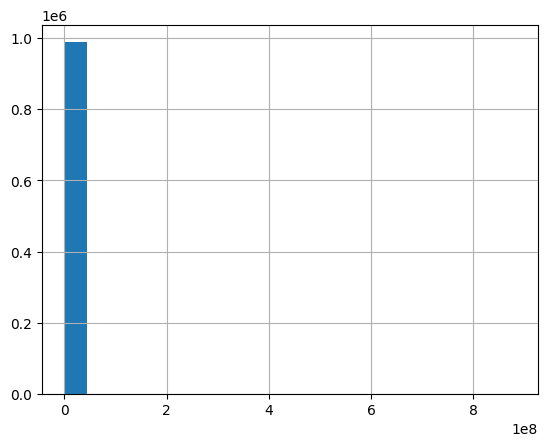

In [70]:
df['assessed_value'].hist(bins=20)


<Axes: xlabel='assessed_value'>

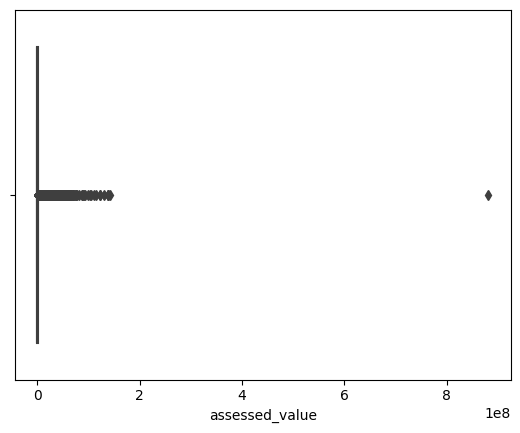

In [72]:
sns.boxplot(x=df['assessed_value'])

<Axes: xlabel='sale_amount'>

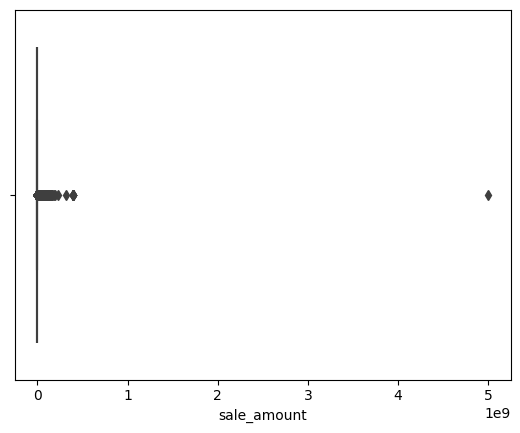

In [73]:
sns.boxplot(x=df['sale_amount'])

In [81]:
df_z = df[df['assessed_value'] <= 2_000.0]

df_z.shape

(2672, 14)